___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="150" height="100" /> 


# SEGUNDO EXAMEN PARCIAL
# MODELO NO LINEAL PARA PRONÓSTICOS

## Examen Tema 2
## Nombre:

## Fecha: 25 de abril del 2023

## Por: Oscar David Jaramillo Z.

# Examen de clasificación de Series de Tiempo con Redes Neuronales

En este problema, se trata de clasificar señales biomédicas, como electrocardiogramas (ECG), en diferentes categorías, como:

    - `~` -> Noisy recording
    - `N` -> Normal rhythm
    - `O` -> Other rhythm
    - `A` -> AF rhythm (Atrial Fibrillation)

Los datos se obtuvieron del siguiente [repositorio](https://github.com/hsd1503/resnet1d). Se utilizará el siguiente [`.pickle`](https://drive.google.com/drive/folders/1AuPxvGoyUbKcVaFmeyt3xsqj6ucWZezf) donde los datos ya se encutran procesados. El objetivo es poder clasificar dada una señal de ECG, a cuál de las 4 clases mostradas inicialmente pertenece dicha serie de tiempo. Se propondrá la siguiente métrica para usar como comparación en cada uno de los algoritmos propuestos.

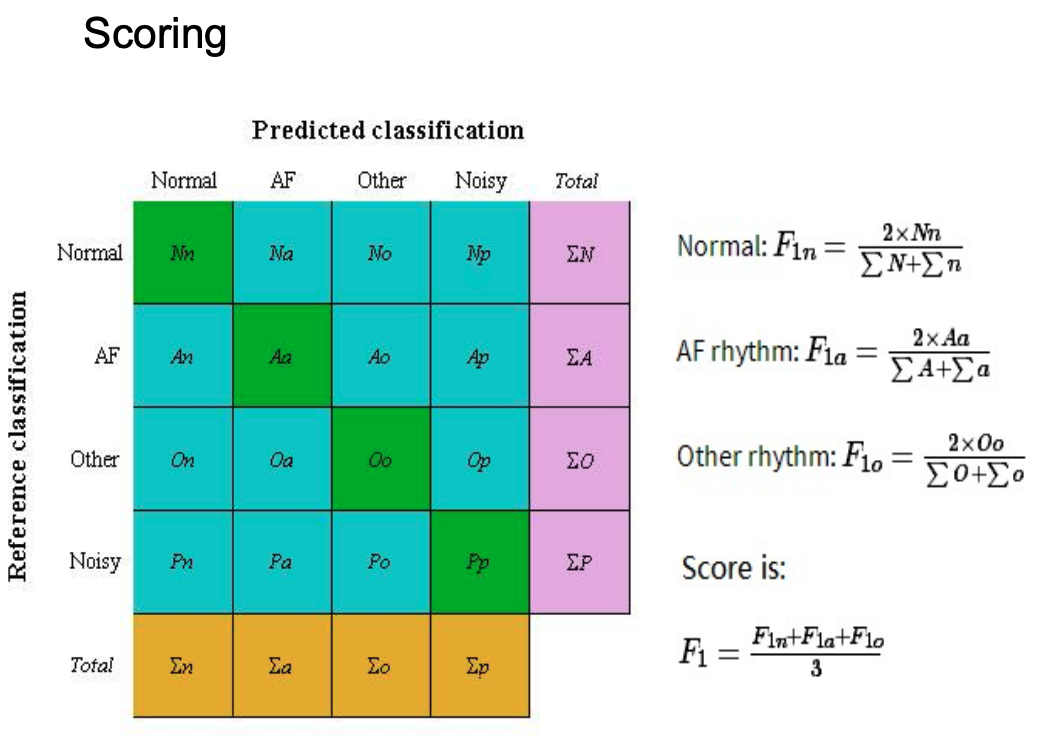

- **Ejercicio 0**: Explica qué es una señal ECG y cómo se utiliza en la medicina. ¿Por qué es importante clasificar las señales ECG correctamente? Explica que el significado de la señal Atrial Fibrillation.

- **Ejercicio 1**: Realiza un análisis exploratorio de los señales sumunistradas y en base a este análisis justifique el procesamiento y/o transformaciones que se debe de hacer a las señales. Justifique su respuesta.

- **Ejercicio 2**: Diseña modelos de clasificación de señales ECG utilizando algoritmos de machine learning, utiliza al menos 6 algoritmos distintos. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo.

- **Ejercicio 3**: Diseña un modelo de clasificación de señales ECG utilizando un algoritmo de clustering, como K-Means. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías evaluar la calidad de la agrupación.

- **Ejercicio 4**: Utilizando las mismas señales preprocesadas, diseña un modelo de clasificación utilizando una red neuronal convolucional (CNN). Diseña al menos 3 estructuras distintas y selecciona aquella que arroje mejores resultados. Recuerda las diversas estructuras estudiadas en clase. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo.

- **Ejercicio 5**: Diseña un modelo de clasificación utilizando una red neuronal LSTM. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo.

- **Ejercicio 6**: Diseña un modelo de clasificación utilizando una red neuronal CNN-LSTM y ConvLSTM. Explica los pasos que seguirías para entrenar y validar el modelo y discute cómo podrías mejorar la precisión del modelo.

- **Ejercicio 7**: Compara el rendimiento de los diferentes modelos de clasificación multiclase utilizando diferentes métricas de evaluación. Usa métricas como precisión, recall y F1-score. ¿Cuál de los modelos ofrece la mejor precisión? ¿Hay diferencias significativas en términos de rendimiento y complejidad computacional entre los modelos? Además, para cada algoritmo calcule el score mostrado en la parte inicial $F_1$.

- **Ejercicio 8**: En base al modelo con mejores métricas encontrado en el ejercicio anterior, realiza un optimización de hiperparámetros con el paquete `optuna`. La métrica que se intentará maximizar es el score $F_1$ definido en el ejercicio anterior.


## Ejercicio 0

## Ejercicio 1

In [ ]:
import numpy as np
from collections import Counter
import pickle
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import imblearn
from utils import plot_confusion_matrix, TimeSeriesNetworks
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score

seeded = 4

In [2]:
with open('challenge2017.pkl', 'rb') as fin:
    res = pickle.load(fin)

all_data = res['data']
all_label = res['label']
print(Counter(all_label))

Counter({'N': 5076, 'O': 2415, 'A': 758, '~': 279})


In [3]:
m = max([len(i) for i in all_data])
h = {j: len(i) for j, i in enumerate(all_data)}
print(list(h.keys())[list(h.values()).index(m)])

5735


In [4]:
np.reshape(all_data[5735], (2, 41, 223))

array([[[  17,   18,   25, ...,  -24,  -22,  -19],
        [ -16,  -12,   -8, ...,  -55,  -66,  -81],
        [-109, -143, -159, ..., -132, -131, -131],
        ...,
        [ 143,  157,  161, ...,  -51,  -52,  -53],
        [ -54,  -56,  -58, ...,  -51,  -51,  -52],
        [ -53,  -55,  -56, ...,    8,    5,    3]],

       [[   0,   -2,  -11, ..., -139, -300, -366],
        [-387, -370, -321, ...,  -12,   -4,    3],
        [  12,   22,   33, ...,   19,    4,   -7],
        ...,
        [ -49,  -48,  -47, ...,   51,   63,   74],
        [  88,  102,  115, ...,  -59,  -59,  -60],
        [ -61,  -62,  -62, ...,   -8,   -7,   -6]]], dtype=int16)

In [5]:
all_data

array([array([-127, -162, -197, ...,  -18,  -22,  -21], dtype=int16),
       array([128, 157, 189, ...,   0,   1,   2], dtype=int16),
       array([ 56,  73,  85, ..., -64, -36, -20], dtype=int16), ...,
       array([-202, -235, -272, ..., -313, -173,  -52], dtype=int16),
       array([-227, -297, -374, ...,  -54,  -44,  -36], dtype=int16),
       array([-237, -286, -338, ...,  -16,  -17,  -18], dtype=int16)],
      dtype=object)

In [6]:
all_label

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

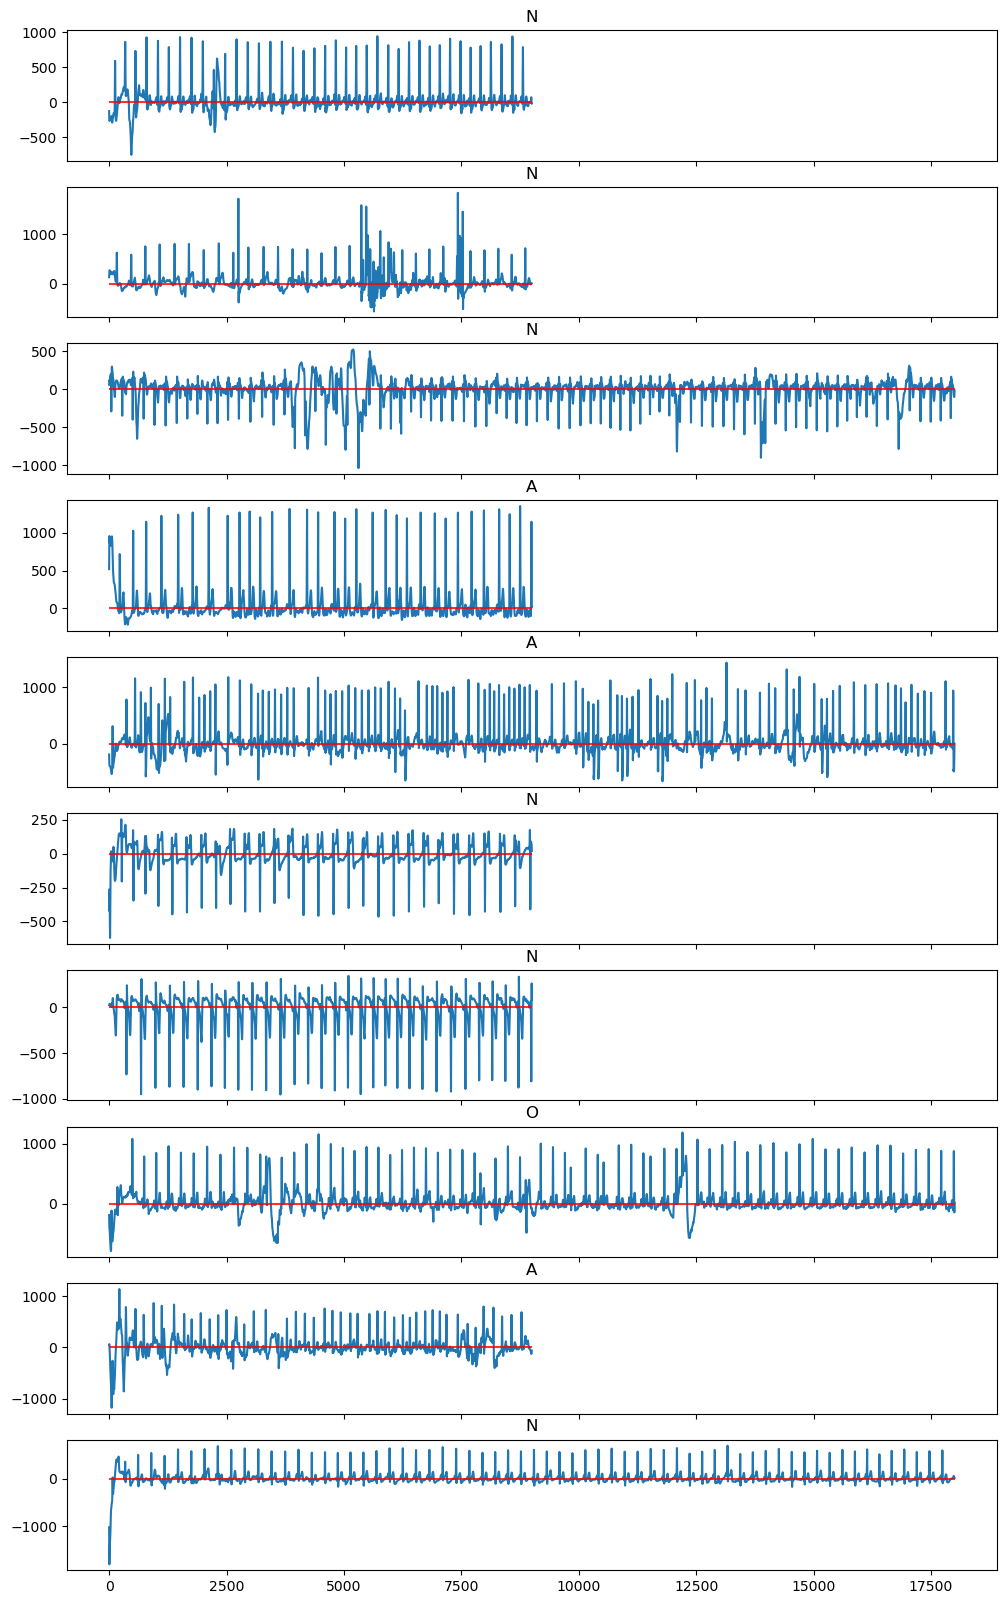

In [7]:
## Plot data
fig, ax = plt.subplots(nrows = 10, ncols = 1, figsize = (12,20), sharex = True)
for i in range(10):
    ax[i].plot(all_data[i])
    ax[i].hlines(0, xmin = 0, xmax = len(all_data[i]), color = 'r', alpha = 0.8)
    ax[i].set_title(all_label[i])

Observando los datos podemos ver que cada uno de ellos es una señal de corazón representada mediante un array, por lo que sabemos que todos iniciaran en el 0, sin embargo no todas son de la misma longitud, por lo que deberemos de estandarizarlas para trabajarlas, una opción podría ser recoratrlas, sin embargo creemos que sera mejor crecer todas a ~18000, para no perder información relevante que pudiera convertir una fibrilación u otra. Las series no seran transformadas, ya que los picos y valles son importantes dentro de las señales cardiacas

Lo que haremos sera convertir todo a un dataframe para poder manejarlo de mejor manera, y rellenaremos las columnas que tengamos como nan con 0, para crear series de la misma longitud

In [8]:
data = pd.DataFrame(list(map(np.ravel, all_data)))
data['class'] = all_label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,18277,18278,18279,18280,18281,18282,18283,18284,18285,class
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,128,157,189,226,250,257,262,265,268,269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,56,73,85,93,100,107,113,117,118,117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,519,619,723,827,914,956,955,934,920,900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
4,-188,-239,-274,-316,-356,-374,-380,-384,-387,-389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


In [9]:
# Suma de dtaos nulos previos a rellenar
data.isna().sum().sum()

72801487

In [10]:
data.fillna(0, inplace=True)

In [11]:
# Datos nulos despues de rellenar
data.isna().sum().sum()

0

Luego revisamos como se balancean nuestras clases, para saber si tendremos que realizar alguna clase de balanceo una vez realizada la separación de datos

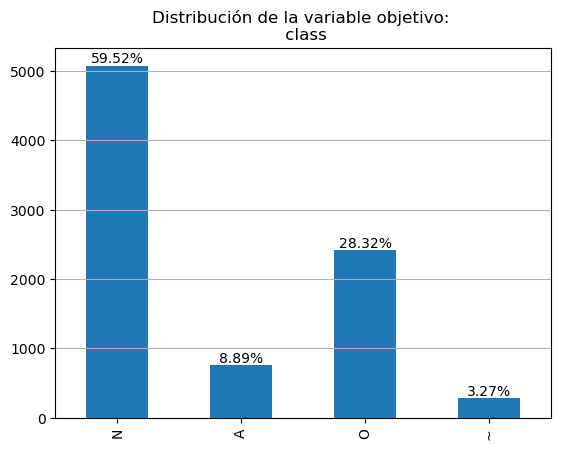

In [12]:
target = 'class'
predictors = [c for c in data.columns if c!=target]

dist_target = data[target].value_counts(sort=False)
dist_target.plot(kind='bar')

target_percentage = round(dist_target / len(data) * 100, 2)

for i in range(len(dist_target)):
    plt.text(i, dist_target[i], f'{target_percentage[i]}%',
            ha='center', va='bottom')

plt.title(f'Distribución de la variable objetivo: \n {target}')
plt.grid(axis='y')
plt.show()

Posteriormente encodeamos nuetsra variable de respuesta, en este caso como un ordinal, por simpleza

In [13]:
labelencoder=LabelEncoder()
data[target] = labelencoder.fit_transform(data[target])
data

,0,1,2,3,4,5,6,7,8,9,...,18277,18278,18279,18280,18281,18282,18283,18284,18285,class
0,-127,-162,-197,-229,-245,-254,-261,-265,-268,-268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,128,157,189,226,250,257,262,265,268,269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,56,73,85,93,100,107,113,117,118,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,519,619,723,827,914,956,955,934,920,900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-188,-239,-274,-316,-356,-374,-380,-384,-387,-389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,-104,-127,-144,-154,-160,-164,-168,-170,-172,-172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8524,-121,-197,-288,-390,-496,-600,-693,-775,-848,-907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8525,-202,-235,-272,-305,-325,-339,-344,-340,-334,-330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8526,-227,-297,-374,-449,-505,-527,-539,-549,-557,-554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [14]:
list(labelencoder.inverse_transform([0, 1, 2, 3]))

['A', 'N', 'O', '~']

Ya teniendo esto procedemos a la separación de datos para luego hacer el rebalanceo y escalamiento

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=seeded, stratify=data[target])

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6822, 18286), (1706, 18286), (6822,), (1706,))

Cuando escalamos los datos tenemos que tener cuidado de no ir a caer en leakeage, rebalanceando solamente los datos de entrenamiento, y haciendo el escalamiento de datos usando solo train

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = predictors)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = predictors)

In [18]:
smote = imblearn.over_sampling.SMOTE()

#Ajustando
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

print('Dimension de los datos originales:', Counter(y_train))
print('Dimension de los datos submuestreados', Counter(y_smote))

Dimension de los datos originales: Counter({1: 4061, 2: 1932, 0: 606, 3: 223})
Dimension de los datos submuestreados Counter({1: 4061, 0: 4061, 2: 4061, 3: 4061})


Luego volvemos a ver las graficas para saber como quedaron

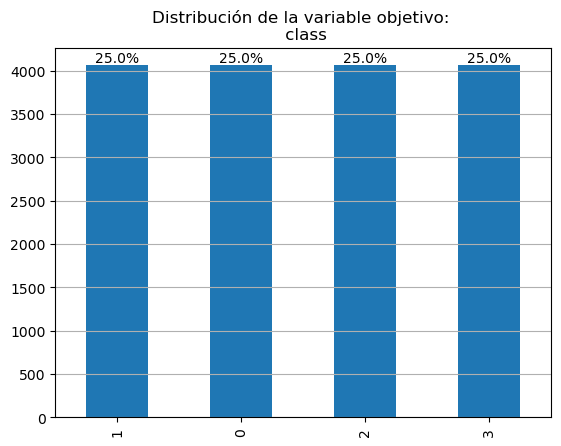

In [19]:
target = 'class'
predictors = [c for c in X_smote.columns if c!=target]

dist_target = y_smote.value_counts(sort=False)
dist_target.plot(kind='bar')

target_percentage = round(dist_target / len(X_smote) * 100, 2)

for i in range(len(dist_target)):
    plt.text(i, dist_target[i], f'{target_percentage[i]}%',
            ha='center', va='bottom')

plt.title(f'Distribución de la variable objetivo: \n {target}')
plt.grid(axis='y')
plt.show()

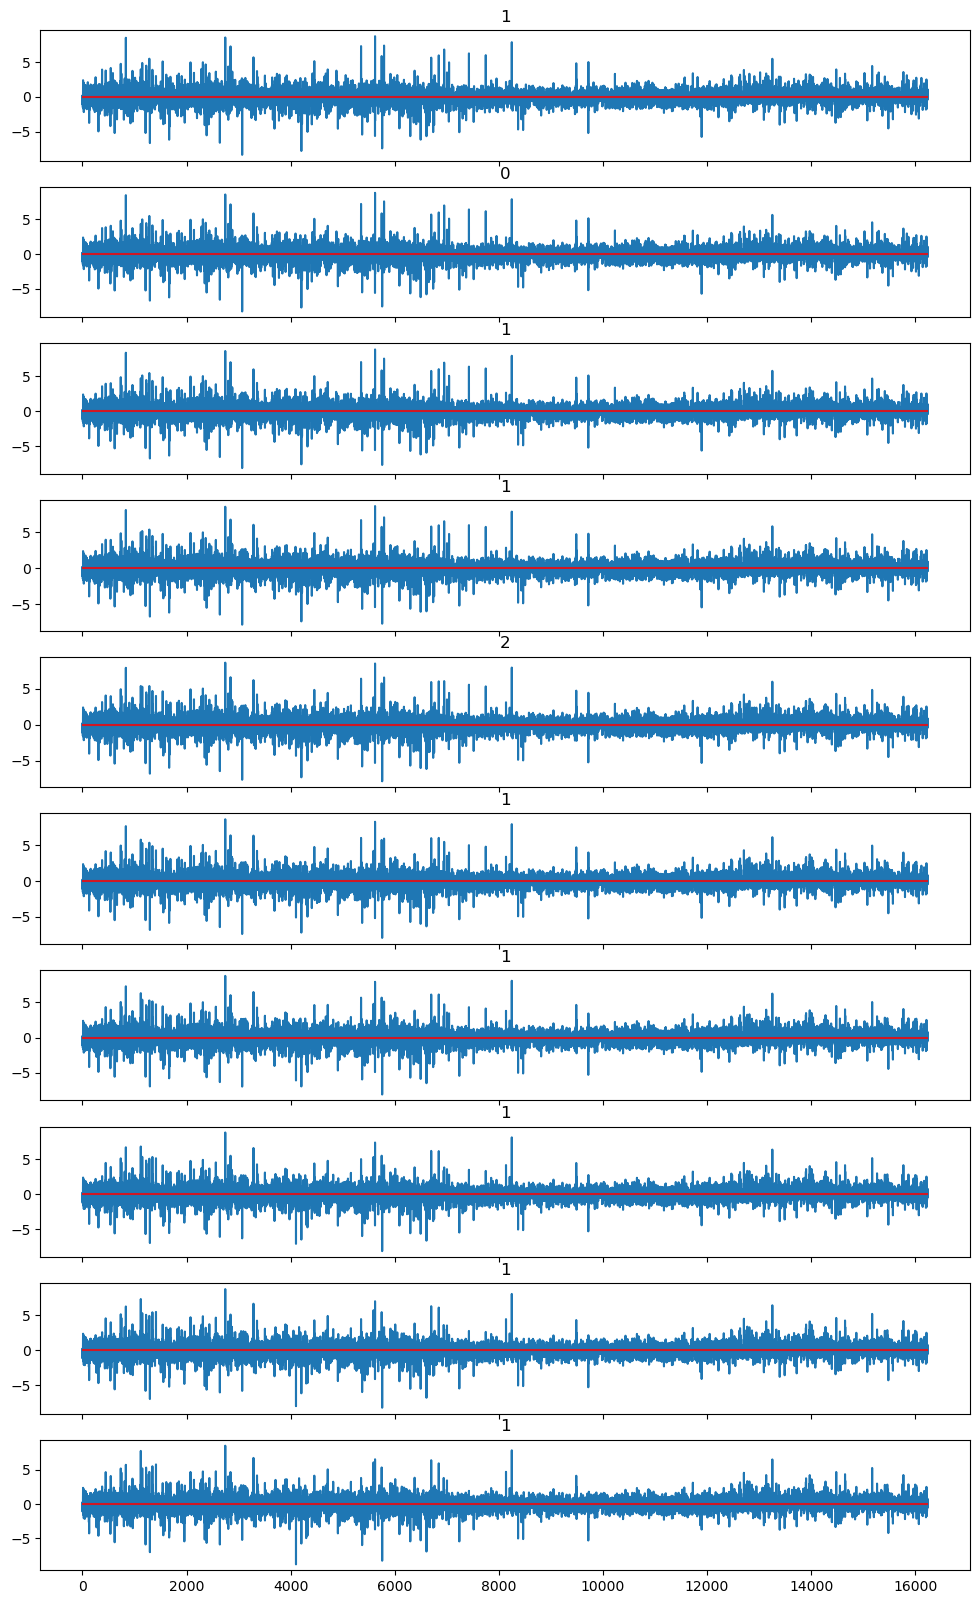

In [20]:
## Plot data
fig, ax = plt.subplots(nrows = 10, ncols = 1, figsize = (12,20), sharex = True)
for i in range(10):
    ax[i].plot(X_smote[i])
    ax[i].hlines(0, xmin = 0, xmax = len(X_smote[i]), color = 'r', alpha = 0.8)
    ax[i].set_title(y_smote[i])

## Ejercicio 2

Usaremos 6 algoritmos de clasificación:
 - Tree Classifier
 - Random Forest
 - XGBoost
 - Support Vector Classifier
 - Gaussian Naive Bayes
 - KNeighbors

#### Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_smote, y_smote)
y_pred_DT = dt.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_DT)

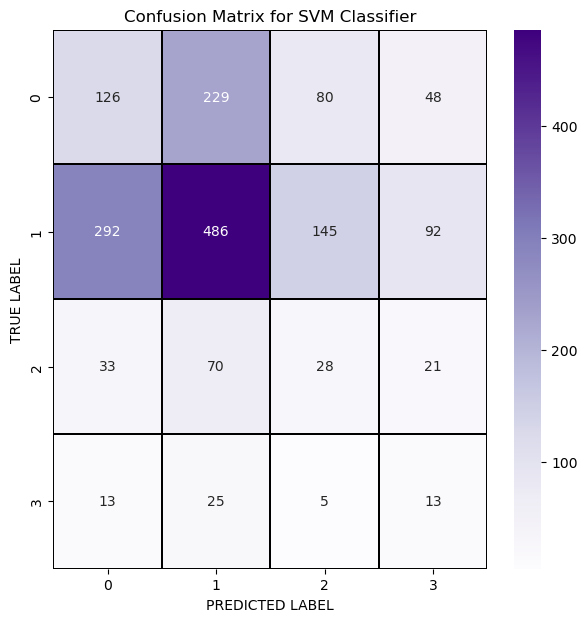

In [23]:
plot_confusion_matrix(y_test, y_pred_DT)

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_smote, y_smote)
y_pred_RF = rf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_RF)

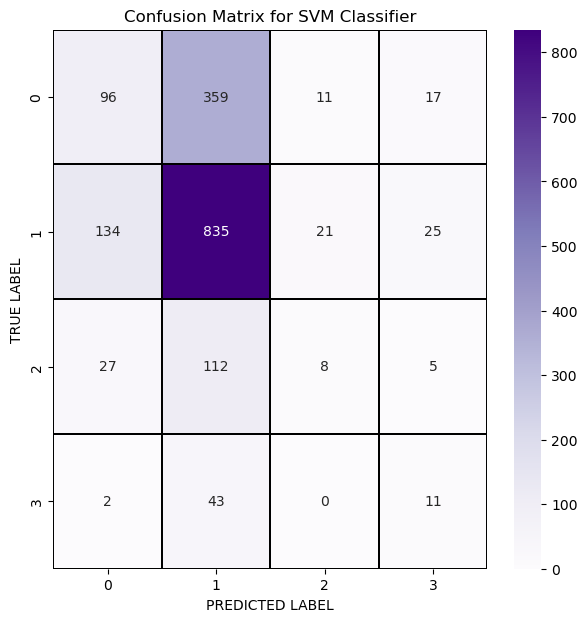

In [25]:
plot_confusion_matrix(y_test, y_pred_RF)

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_smote, y_smote)
y_pred_XGB = xgb.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_XGB)

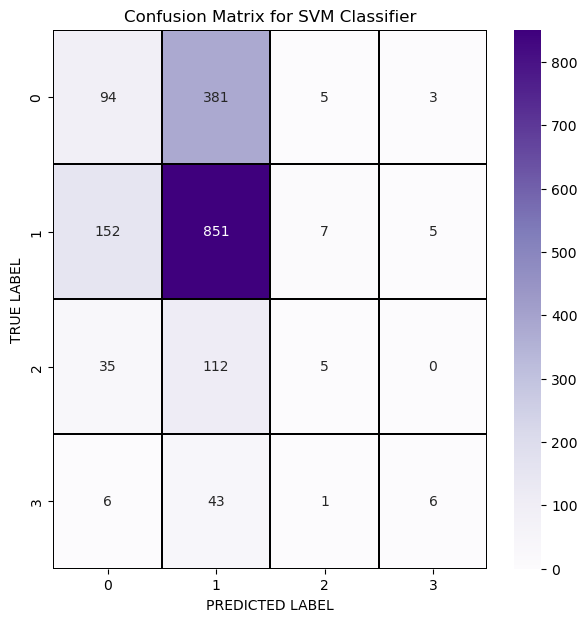

In [ ]:
plot_confusion_matrix(y_test, y_pred_XGB)

#### SVC

In [ ]:
from sklearn.svm import SVC
sv = SVC().fit(X_smote, y_smote)
y_pred_SVC = sv.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_SVC)

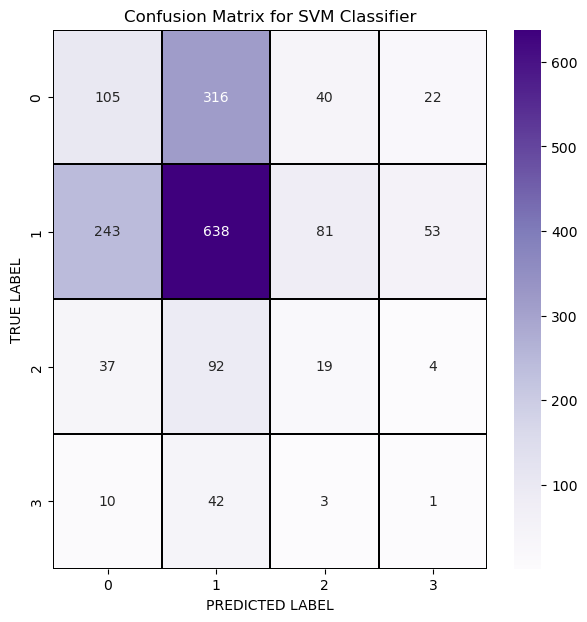

In [ ]:
plot_confusion_matrix(y_test, y_pred_SVC)

#### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_smote, y_smote)
y_pred_GNB = gnb.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_GNB)

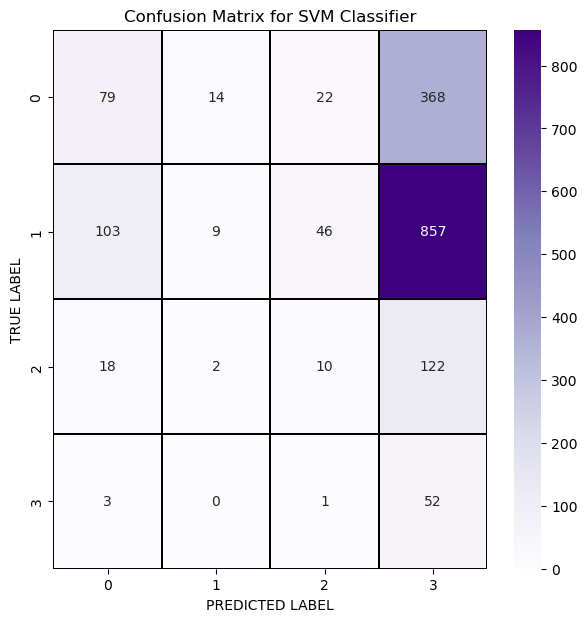

In [ ]:
plot_confusion_matrix(y_test, y_pred_GNB)

#### KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier().fit(X_smote, y_smote)
y_pred_KN = kn.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_KN)

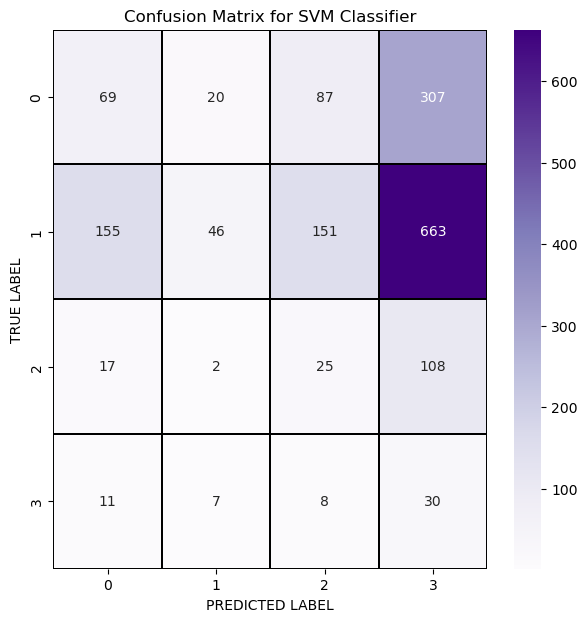

In [ ]:
plot_confusion_matrix(y_test, y_pred_KN)

## Ejercicio 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X_smote)
y_pred_KMeans = kmeans.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_KMeans)

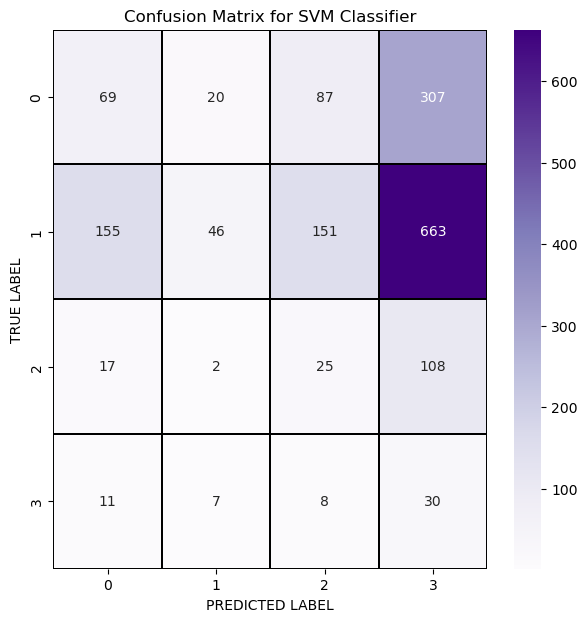

In [ ]:
plot_confusion_matrix(y_test, y_pred_KN)

## Ejercicio 4, 5 y 6

Para simplificar esto, lo que haremos sera utilizar la clase que hemos creado para el examen número 2, con unas pequeñas modificaciónes, de manera que predigan para clasificación y no regresión

In [28]:
models = TimeSeriesNetworks(X_smote, y_smote)
models.model()
models.maxAccuracy

Now training cnn 0
Now training cnn 1
Now training cnn 2
Now training lstm 0


In [ ]:
y_pred_CNN0 = models.models['cnn'][0].predict(X_test_scaled)
y_pred_CNN1 = models.models['cnn'][1].predict(X_test_scaled)
y_pred_CNN2 = models.models['cnn'][2].predict(X_test_scaled)
y_pred_LSTM0 = models.models['lstm'][0].predict(X_test_scaled)
y_pred_CNN_LSTM0 = models.models['cnn-lstm'][0].predict(X_test_scaled)

In [ ]:
models.models['cnn'][0].summary()

In [ ]:
models.models['cnn'][1].summary()

In [ ]:
models.models['cnn'][2].summary()

In [ ]:
models.models['lstm'][0].summary()

In [ ]:
models.models['cnn-lstm'][0].summary()

## Ejercicio 7

In [ ]:
#f1
f1s = {}
f1s['DT']        = f1_score(y_test, y_pred_DT, average=None, labels=y_test.unique())
f1s['RF']        = f1_score(y_test, y_pred_RF, average=None, labels=y_test.unique())
f1s['XGB']       = f1_score(y_test, y_pred_XGB, average=None, labels=y_test.unique())
f1s['GNB']       = f1_score(y_test, y_pred_GNB, average=None, labels=y_test.unique())
f1s['KN']        = f1_score(y_test, y_pred_KN, average=None, labels=y_test.unique())
f1s['KMeans']    = f1_score(y_test, y_pred_KMeans, average=None, labels=y_test.unique())
f1s['CNN0']      = f1_score(y_test, y_pred_CNN0, average=None, labels=y_test.unique())
f1s['CNN1']      = f1_score(y_test, y_pred_CNN1, average=None, labels=y_test.unique())
f1s['CNN2']      = f1_score(y_test, y_pred_CNN2, average=None, labels=y_test.unique())
f1s['LSTM0']     = f1_score(y_test, y_pred_LSTM0, average=None, labels=y_test.unique())
f1s['CNN-LSTM0'] = f1_score(y_test, y_pred_CNN_LSTM0, average=None, labels=y_test.unique())
f1s

## Ejercicio 8

In [ ]:
#optuna

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>